In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import sys
import os
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../backend'))

from core.data.DataCollector import DataCollector

In [2]:
dc = DataCollector()

dc.collect_options_data('/Users/mikeb/Desktop/VolaSurfer/backend/core/data/SPY_Options_log.txt')

/Users/mikeb/Desktop/VolaSurfer/backend/core/analytics/Utils.py:9: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
/Users/mikeb/Desktop/VolaSurfer/backend/core/analytics/Utils.py:10: RuntimeWarning: invalid value encountered in sqrt
  d2 = d1 - sigma * np.sqrt(T)
/Users/mikeb/Desktop/VolaSurfer/backend/core/analytics/Utils.py:208: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * np.power(sigma, 2)) * T) / sigma *np.sqrt(T)
/Users/mikeb/Desktop/VolaSurfer/backend/core/analytics/Utils.py:209: RuntimeWarning: invalid value encountered in sqrt
  vg = S * norm.pdf(d1, 0.0, 1.0) * np.sqrt(T)


OptionsData(symbol='SPY', timestamps=[Timestamp('2023-01-04 06:30:00'), Timestamp('2023-01-05 06:30:00'), Timestamp('2023-01-06 06:30:00'), Timestamp('2023-01-09 06:30:00'), Timestamp('2023-01-10 06:30:00'), Timestamp('2023-01-11 06:30:00'), Timestamp('2023-01-12 06:30:00'), Timestamp('2023-01-13 06:30:00'), Timestamp('2023-01-17 06:30:00'), Timestamp('2023-01-18 06:30:00'), Timestamp('2023-01-19 06:30:00'), Timestamp('2023-01-20 06:30:00'), Timestamp('2023-01-23 06:30:00'), Timestamp('2023-01-24 06:30:00'), Timestamp('2023-01-25 06:30:00'), Timestamp('2023-01-26 06:30:00'), Timestamp('2023-01-27 06:30:00'), Timestamp('2023-01-30 06:30:00'), Timestamp('2023-01-31 06:30:00'), Timestamp('2023-02-01 06:30:00'), Timestamp('2023-02-02 06:30:00'), Timestamp('2023-02-03 06:30:00'), Timestamp('2023-02-06 06:30:00'), Timestamp('2023-02-07 06:30:00'), Timestamp('2023-02-08 06:30:00'), Timestamp('2023-02-09 06:30:00'), Timestamp('2023-02-10 06:30:00'), Timestamp('2023-02-13 06:30:00'), Timestamp(

In [3]:
# Get the data
data = dc.get_cached_data('/Users/mikeb/Desktop/VolaSurfer/backend/core/data/SPY_Options_log.txt')

print("Data Structure:")
print(f"\nSymbol: {data.symbol}")
print(f"\nNumber of timestamps: {len(data.timestamps)}")
print(f"Time range: {min(data.timestamps)} to {max(data.timestamps)}")

print(f"\nNumber of expiration dates: {len(data.expiration_dates)}")
print(f"Expiration range: {min(data.expiration_dates)} to {max(data.expiration_dates)}")

print(f"\nNumber of strikes: {len(data.strikes)}")
print(f"Strike range: ${min(data.strikes):.2f} to ${max(data.strikes):.2f}")

print("\nCalls DataFrame shape:", data.calls.shape)
print("Puts DataFrame shape:", data.puts.shape)

print("\nCalls DataFrame columns:", list(data.calls.columns))


Data Structure:

Symbol: SPY

Number of timestamps: 212
Time range: 2023-01-04 06:30:00 to 2023-11-06 06:30:00

Number of expiration dates: 23
Expiration range: 2023-01-19 00:00:00 to 2024-01-19 00:00:00

Number of strikes: 117
Strike range: $364.00 to $474.00

Calls DataFrame shape: (22510, 27)
Puts DataFrame shape: (22515, 27)

Calls DataFrame columns: ['timestamp', 'ticker_option', 'maturity', 'strike', 'option_type', 'bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close', 'ticker_price', 'open', 'high', 'low', 'close', 'volume', 'bid_mid', 'ask_mid', 'mid_price', 'T', 'days_to_expiry', 'implied_volatility', 'log_strike', 'vega']


In [4]:
data_df = dc.get_cached_data_as_df('/Users/mikeb/Desktop/VolaSurfer/backend/core/data/SPY_Options_log.txt')


In [5]:
data_df.index

MultiIndex([('2023-01-04 06:30:00', 15.729166666666666, 364.0, 'Call'),
            ('2023-01-04 06:30:00', 15.729166666666666, 364.0,  'Put'),
            ('2023-01-04 06:30:00', 15.729166666666666, 365.0, 'Call'),
            ('2023-01-04 06:30:00', 15.729166666666666, 365.0,  'Put'),
            ('2023-01-04 06:30:00', 15.729166666666666, 366.0, 'Call'),
            ('2023-01-04 06:30:00', 15.729166666666666, 366.0,  'Put'),
            ('2023-01-04 06:30:00', 15.729166666666666, 367.0, 'Call'),
            ('2023-01-04 06:30:00', 15.729166666666666, 367.0,  'Put'),
            ('2023-01-04 06:30:00', 15.729166666666666, 368.0, 'Call'),
            ('2023-01-04 06:30:00', 15.729166666666666, 368.0,  'Put'),
            ...
            ('2023-11-06 06:30:00',  73.72916666666667, 423.0, 'Call'),
            ('2023-11-06 06:30:00',  73.72916666666667, 423.0,  'Put'),
            ('2023-11-06 06:30:00',  73.72916666666667, 424.0, 'Call'),
            ('2023-11-06 06:30:00',  73.72916666

In [6]:
data_df

ticker_option  \
timestamp           days_to_expiry strike option_type                 
2023-01-04 06:30:00 15.729167      364.0  Call                  SPY   
                                          Put                   SPY   
                                   365.0  Call                  SPY   
                                          Put                   SPY   
                                   366.0  Call                  SPY   
...                                                             ...   
2023-11-06 06:30:00 73.729167      425.0  Put                   SPY   
                                   426.0  Call                  SPY   
                                          Put                   SPY   
                                   427.0  Call                  SPY   
                                          Put                   SPY   

                                                        maturity  bid_open  \
timestamp           days_to_expiry strike option_type                        
2023-01-04 06:30:00 15.729167      364.0  Call        2023-01-20     19.79   
                                          Put         2023-01-20      1.57   
                                   365.0  Call        2023-01-20     18.93   
                                          Put         2023-01-20      1.70   
                                   366.0  Call        2023-01-20     18.08   
...                                                          ...       ...   
2023-11-06 06:30:00 73.729167      425.0  Put         2024-01-19      8.27   
                                   426.0  Call        2024-01-19     16.33   
                                          Put         2024-01-19      8.58   
                                   427.0  Call        2024-01-19     15.64   
                                          Put         2024-01-19      8.90   

                                                       bid_high  bid_low  \
timestamp           days_to_expiry strike option_type                      
2023-01-04 06:30:00 15.729167      364.0  Call            24.36    17.02   
                                          Put              2.61     1.26   
                                   365.0  Call            23.47    16.11   
                                          Put              2.83     1.38   
                                   366.0  Call            22.60    15.36   
...                                                         ...      ...   
2023-11-06 06:30:00 73.729167      425.0  Put              8.27     6.47   
                                   426.0  Call            20.01    16.33   
                                          Put              8.58     6.63   
                                   427.0  Call            19.26    15.64   
                                          Put              8.90     6.02   

                                                       bid_close  ask_open  \
timestamp           days_to_expiry strike option_type                        
2023-01-04 06:30:00 15.729167      364.0  Call             18.99     24.79   
                                          Put               1.86      1.60   
                                   365.0  Call             18.17     23.93   
                                          Put               2.03      1.94   
                                   366.0  Call             17.37     23.08   
...                                                          ...       ...   
2023-11-06 06:30:00 73.729167      425.0  Put               6.87      8.30   
                                   426.0  Call             18.81     16.39   
                                          Put               7.12      8.61   
                                   427.0  Call             18.08     15.70   
                                          Put               7.39      8.94   

                                                       ask_high  ask_low  \
timestamp           days_to_expiry 

In [8]:
def get_nearest_contracts(df, target_days=30, n_strikes=4):
    # Create an empty list to store filtered dataframes
    filtered_dfs = []
    
    # Process each unique timestamp
    for timestamp in df.index.get_level_values('timestamp').unique():
        # Get data for this timestamp
        df_t = df.xs(timestamp, level='timestamp')
        
        # Find the expiry closest to target_days
        days_to_expiry = df_t.index.get_level_values('days_to_expiry').unique()
        nearest_expiry = days_to_expiry[np.abs(days_to_expiry - target_days).argmin()]
        
        # Get data for nearest expiry
        df_te = df_t.xs(nearest_expiry, level='days_to_expiry')
        
        # Get the close price for this timestamp
        close_price = df_te['close'].iloc[0]
        
        # Get unique strikes
        strikes = df_te.index.get_level_values('strike').unique()
        
        # Find n closest strikes to close price
        closest_strikes = strikes[np.argsort(np.abs(strikes - close_price))[:n_strikes]]
        
        # Filter for these strikes
        df_tes = df_te[df_te.index.get_level_values('strike').isin(closest_strikes)]
        
        # Add back the timestamp index level
        df_tes = df_tes.assign(timestamp=timestamp).set_index('timestamp', append=True).reorder_levels(['timestamp', 'strike', 'option_type'])
        
        filtered_dfs.append(df_tes)
    
    # Combine all filtered dataframes
    result = pd.concat(filtered_dfs)
    
    return result

def calculate_iv_index(contracts_df):
    """
    Calculate vega-weighted implied volatility index from nearest contracts.
    For each timestamp, aggregates implied volatilities weighted by vega separately 
    for calls and puts, then averages the two.
    
    Args:
        contracts_df: DataFrame with multi-index [timestamp, strike, option_type]
                     containing 'implied_vol' and 'vega' columns
    
    Returns:
        Series indexed by timestamp containing the IV index values
    """
    # Initialize list to store results
    iv_index_values = []
    timestamps = contracts_df.index.get_level_values('timestamp').unique()
    
    for ts in timestamps:
        ts_data = contracts_df.xs(ts, level='timestamp')
        
        # Calculate weighted IV separately for calls and puts
        call_data = ts_data.xs('Call', level='option_type')
        put_data = ts_data.xs('Put', level='option_type')
        
        # Weight IVs by vega
        weighted_call_iv = (call_data['implied_volatility'] * call_data['vega']).sum() / call_data['vega'].sum()
        weighted_put_iv = (put_data['implied_volatility'] * put_data['vega']).sum() / put_data['vega'].sum()
        
        # Average of call and put weighted IVs
        iv_index = (weighted_call_iv + weighted_put_iv) / 2
        
        iv_index_values.append((ts, iv_index))
    
    # Create series from results
    iv_index_series = pd.Series(dict(iv_index_values), name='iv_index')
    iv_index_series.index.name = 'timestamp'
    
    return iv_index_series

/var/folders/qf/_lw98w6j05n0p0bwxdtwdl7r0000gn/T/ipykernel_35044/296025906.py:65: RuntimeWarning: invalid value encountered in scalar divide
  weighted_put_iv = (put_data['implied_volatility'] * put_data['vega']).sum() / put_data['vega'].sum()


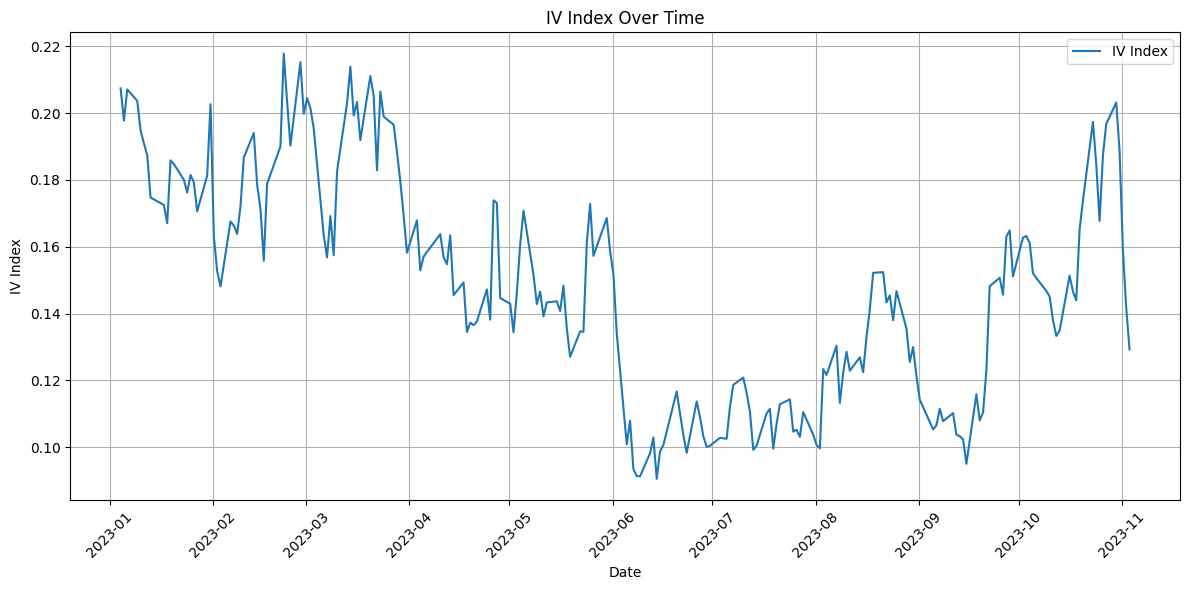

In [10]:
# Filter for nearest contracts
nearest_contracts = get_nearest_contracts(data_df, target_days=30, n_strikes=4)

# Calculate the IV index
iv_index = calculate_iv_index(nearest_contracts)

# Plot the IV index
plt.figure(figsize=(12, 6))
plt.plot(iv_index.index, iv_index.values, label='IV Index')
plt.title('IV Index Over Time')
plt.xlabel('Date')
plt.ylabel('IV Index')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/qf/_lw98w6j05n0p0bwxdtwdl7r0000gn/T/ipykernel_35044/296025906.py:65: RuntimeWarning: invalid value encountered in scalar divide
  weighted_put_iv = (put_data['implied_volatility'] * put_data['vega']).sum() / put_data['vega'].sum()


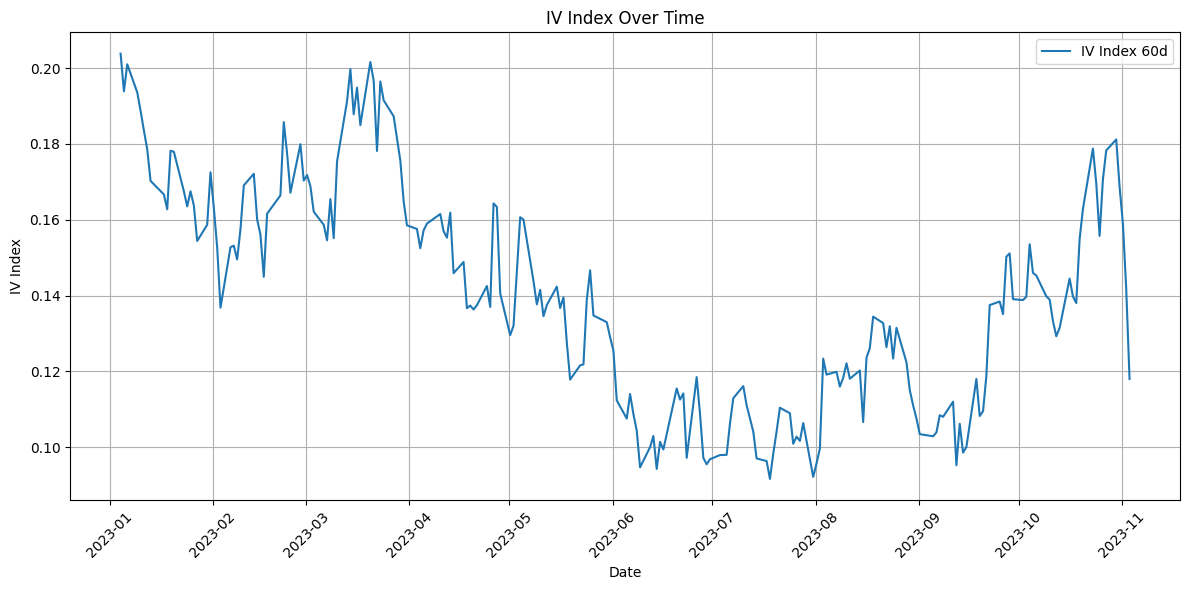

In [11]:
# Filter for nearest contracts
nearest_contracts = get_nearest_contracts(data_df, target_days=60, n_strikes=4)

# Calculate the IV index
iv_index = calculate_iv_index(nearest_contracts)

# Plot the IV index
plt.figure(figsize=(12, 6))
plt.plot(iv_index.index, iv_index.values, label='IV Index 60d')
plt.title('IV Index Over Time')
plt.xlabel('Date')
plt.ylabel('IV Index')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
